In [8]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [9]:
df = pa.read_json("https://raw.githubusercontent.com/misode/mcmeta/data-json/data/minecraft/dimension/overworld.json")

### Filter biomes

In [10]:
biomes = df["generator"]["biome_source"]["biomes"]
dfName = pa.DataFrame([b["biome"] for b in biomes], columns=["biomes"])

params = [b["parameters"] for b in biomes]
parameters = [[p["erosion"], p["depth"], p["weirdness"], p["offset"], p["temperature"], p["humidity"], p["continentalness"]] for p in params]
dfParameters = pa.DataFrame(parameters, columns=["erosion", "depth", "weirdness", "offset", "temperature", "humidity", "continentalness"])

### The dataset

In [11]:
dataset = pa.concat([dfName, dfParameters], axis=1)

In [12]:
dataset

,biomes,erosion,depth,weirdness,offset,temperature,humidity,continentalness
0,minecraft:mushroom_fields,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[-1.0, 1.0]","[-1.2, -1.05]"
1,minecraft:mushroom_fields,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[-1.0, 1.0]","[-1.2, -1.05]"
2,minecraft:deep_frozen_ocean,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[-1.0, -0.45]","[-1.0, 1.0]","[-1.05, -0.455]"
3,minecraft:deep_frozen_ocean,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[-1.0, -0.45]","[-1.0, 1.0]","[-1.05, -0.455]"
4,minecraft:frozen_ocean,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[-1.0, -0.45]","[-1.0, 1.0]","[-0.455, -0.19]"
...,...,...,...,...,...,...,...,...
7588,minecraft:desert,"[0.55, 1.0]",0.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[-0.19, -0.11]"
7589,minecraft:desert,"[0.55, 1.0]",1.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[-0.19, -0.11]"
7590,minecraft:dripstone_caves,"[-1.0, 1.0]","[0.2, 0.9]","[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[-1.0, 1.0]","[0.8, 1.0]"
7591,minecraft:lush_caves,"[-1.0, 1.0]","[0.2, 0.9]","[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[0.7000000000000001, 1.0]","[-1.0, 1.0]"


### Get biomes list

In [13]:
bName = dataset["biomes"].drop_duplicates()
print(len(bName))
bName

52


0                minecraft:mushroom_fields
2              minecraft:deep_frozen_ocean
4                   minecraft:frozen_ocean
6                minecraft:deep_cold_ocean
8                     minecraft:cold_ocean
10                    minecraft:deep_ocean
12                         minecraft:ocean
14           minecraft:deep_lukewarm_ocean
16                minecraft:lukewarm_ocean
18                    minecraft:warm_ocean
22                   minecraft:stony_shore
24                         minecraft:swamp
26                minecraft:mangrove_swamp
28                  minecraft:snowy_slopes
34                  minecraft:snowy_plains
44                   minecraft:snowy_beach
52      minecraft:windswept_gravelly_hills
88                         minecraft:grove
112              minecraft:windswept_hills
124                  minecraft:snowy_taiga
142             minecraft:windswept_forest
154                        minecraft:taiga
180                       minecraft:plains
182        

### Give color to some biome

In [14]:
bName = np.array(["minecraft:savanna", "minecraft:plains", "minecraft:forest", "minecraft:jungle", "minecraft:flower_forest", "minecraft:ocean", "minecraft:warm_ocean", "minecraft:mushroom_fields", "minecraft:desert", "minecraft:swamp", "minecraft:badlands", "minecraft:river", "minecraft:snowy_plains"])
def getBiomeColor(name):
  colors = ['r','lime','forestgreen','darkgreen', 'gray','b','c','m','yellow','goldenrod','orange','pink','k']
  pos = np.where(bName == name)[0]

  if pos.size == 0 or pos[0] >= len(colors):
    return "purple"
  return colors[pos[0]]

In [15]:
def showVec(ds, vecName):
  ds = ds.sort_values("biomes") # sort by biomes

  for i in range(0, len(ds), 1):
    d = ds.iloc[i]
    y = d[vecName] # (min, max)
    color = getBiomeColor(d["biomes"])
    plt.plot((i, i), y, color=color)

In [16]:
nameSelect = ["minecraft:savanna", "minecraft:plains", "minecraft:forest", "minecraft:jungle",
              "minecraft:ocean", "minecraft:warm_ocean", "minecraft:mushroom_fields",
              "minecraft:desert", "minecraft:swamp", "minecraft:snowy_plains", "minecraft:badlands",
              "minecraft:river", "minecraft:flower_forest", "minecraft:jagged_peaks"]
bNameSelect = [any(b == bn for bn in nameSelect) for b in dataset["biomes"]]


In [17]:
dataset[bNameSelect].sort_values("biomes") # sort by biomes

,biomes,erosion,depth,weirdness,offset,temperature,humidity,continentalness
1828,minecraft:badlands,"[-1.0, -0.7799]",0.0,"[-0.7666000000000001, -0.5666]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[-0.19, 1.0]"
612,minecraft:badlands,"[-0.2225, 0.05]",0.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[0.03, 1.0]"
609,minecraft:badlands,"[-0.375, -0.2225]",1.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[0.30000000000000004, 1.0]"
608,minecraft:badlands,"[-0.375, -0.2225]",0.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[0.30000000000000004, 1.0]"
607,minecraft:badlands,"[-0.375, -0.2225]",1.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[0.03, 0.30000000000000004]"
...,...,...,...,...,...,...,...,...
2590,minecraft:swamp,"[0.55, 1.0]",0.0,"[-0.4, -0.2666]",0.0,"[-0.45, 0.2]","[-1.0, 1.0]","[-0.11, 1.0]"
21,minecraft:warm_ocean,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[0.55, 1.0]","[-1.0, 1.0]","[-0.455, -0.19]"
20,minecraft:warm_ocean,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[0.55, 1.0]","[-1.0, 1.0]","[-0.455, -0.19]"
19,minecraft:warm_ocean,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[0.55, 1.0]","[-1.0, 1.0]","[-1.05, -0.455]"


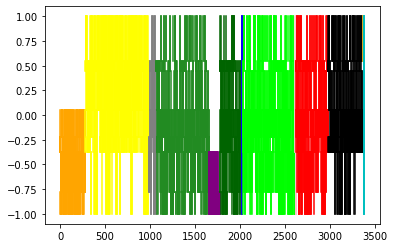

In [18]:
showVec(dataset[bNameSelect], "erosion") # nivelé more high is more flatten

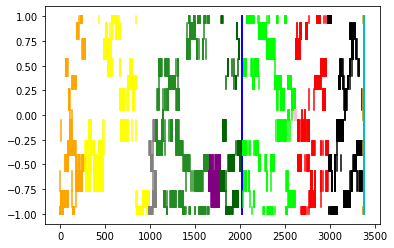

In [19]:
showVec(dataset[bNameSelect], "weirdness") # more high more high altitude ?

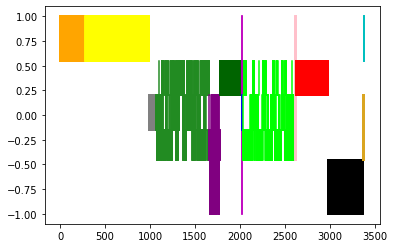

In [20]:
showVec(dataset[bNameSelect], "temperature") # biome grouping

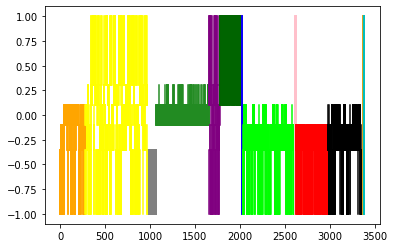

In [21]:
showVec(dataset[bNameSelect], "humidity") # biome grouping 2

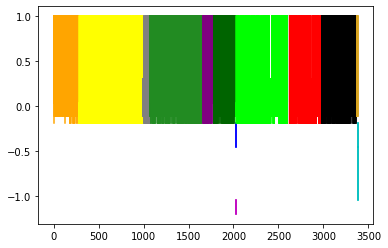

In [22]:
showVec(dataset[bNameSelect], "continentalness")

## Test with desert

In [23]:
# desert = dataset[dataset["biomes"] == "minecraft:jagged_peaks"]
desert = dataset

index = []
for i, d in desert.iterrows():
  # if d["erosion"][0] == -0.2225 and d["erosion"][1] == 0.45 and d["humidity"][0] == 0.1 and d["humidity"][1] == 0.30000000000000004:
  if d["depth"] == 0.0 and d["erosion"][1] < -0.3 and d["weirdness"][1] < 0.4 and d["temperature"][0] > 0.5 and d["humidity"][0] > 0.3 and d["continentalness"][0] > 0:
    index.append(i)
index

desert.loc[index]

,biomes,erosion,depth,weirdness,offset,temperature,humidity,continentalness
714,minecraft:wooded_badlands,"[-0.7799, -0.375]",0.0,"[-1.0, -0.9333]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.30000000000000004, 1.0]"
1366,minecraft:wooded_badlands,"[-1.0, -0.7799]",0.0,"[-0.9333, -0.7666000000000001]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
1370,minecraft:wooded_badlands,"[-0.7799, -0.375]",0.0,"[-0.9333, -0.7666000000000001]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
1920,minecraft:wooded_badlands,"[-0.7799, -0.375]",0.0,"[-0.7666000000000001, -0.5666]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
2566,minecraft:wooded_badlands,"[-1.0, -0.7799]",0.0,"[-0.5666, -0.4]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
2570,minecraft:wooded_badlands,"[-0.7799, -0.375]",0.0,"[-0.5666, -0.4]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
3280,minecraft:wooded_badlands,"[-0.7799, -0.375]",0.0,"[-0.4, -0.2666]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.30000000000000004, 1.0]"
3802,minecraft:wooded_badlands,"[-1.0, -0.375]",0.0,"[-0.2666, -0.05]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
3890,minecraft:wooded_badlands,"[-1.0, -0.375]",0.0,"[-0.05, 0.05]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
4390,minecraft:wooded_badlands,"[-1.0, -0.375]",0.0,"[0.05, 0.2666]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"


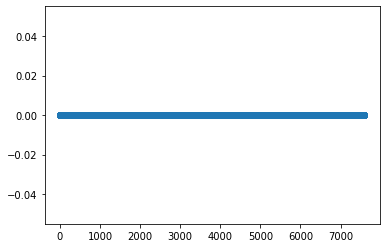

In [24]:
import matplotlib.pyplot as plt

X = np.linspace(0, len(desert)-1, len(desert))
plt.scatter(X, desert["offset"])

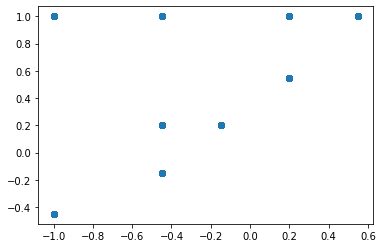

In [25]:
X = [t[0] for t in desert["temperature"]]
Y = [t[1] for t in desert["temperature"]]
plt.scatter(X, Y)